# **Import and Install Dependencies**

In [7]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from mediapipe.python.solutions.pose import PoseLandmark
from mediapipe.python.solutions.drawing_utils import DrawingSpec

# **Access using Using MediaPipe**

In [8]:
#define mediapipe holistic and drawing utils
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [9]:
#detect using mediapipe model
def media_pipe_detection(image, model):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB) 
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR) 
    return image, results

In [10]:
#draw landmarks without style
def draw_land_marks(image, results):
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    
    # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

    custom_pose_connections = list(mp_pose.POSE_CONNECTIONS)
    
    excluded_landmarks = [
        PoseLandmark.NOSE,
        PoseLandmark.LEFT_EYE_INNER,
        PoseLandmark.LEFT_EYE,
        PoseLandmark.LEFT_EYE_OUTER,
        PoseLandmark.RIGHT_EYE_INNER,
        PoseLandmark.RIGHT_EYE,
        PoseLandmark.RIGHT_EYE_OUTER,
        PoseLandmark.LEFT_EAR,
        PoseLandmark.RIGHT_EAR,
        PoseLandmark.MOUTH_LEFT,
        PoseLandmark.MOUTH_RIGHT,
        PoseLandmark.LEFT_HIP,
        PoseLandmark.RIGHT_HIP,
        PoseLandmark.LEFT_KNEE,
        PoseLandmark.RIGHT_KNEE,
        PoseLandmark.LEFT_ANKLE,
        PoseLandmark.RIGHT_ANKLE,
        PoseLandmark.LEFT_HEEL,
        PoseLandmark.RIGHT_HEEL,
        PoseLandmark.LEFT_FOOT_INDEX,
        PoseLandmark.RIGHT_FOOT_INDEX
    ]

    for landmark in excluded_landmarks:
        custom_pose_connections = [connection_tuple for connection_tuple in custom_pose_connections if landmark.value not in connection_tuple]

    mp_drawing.draw_landmarks(image, results.pose_landmarks, connections=custom_pose_connections)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [11]:
#draw landmarks with style (different color)
def draw_styled_handmarks(image, results):
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION , 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
   
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2),
                             ) 
      
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
     
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
cap = cv.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = media_pipe_detection(frame, holistic)
        draw_land_marks(image, results)

        # FOR BLACK BACKGROUND
        # image, results = media_pipe_detection(frame, holistic)
        # black_bg = np.zeros((frame.shape[0], frame.shape[1], frame.shape[2]))
        # draw_land_marks(black_bg, results)
        
        cv.imshow('Media Pipe Test', image)
        
        if(cv.waitKey(10) & 0xFF == ord(' ')):
            break

cap.release()
cv.destroyAllWindows()

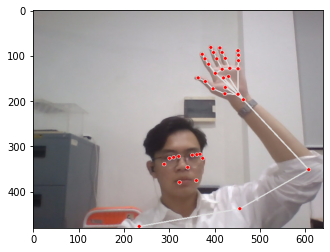

In [11]:
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [13]:
print(frame.shape)

(480, 640, 3)


In [63]:
cap = cv.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        black_bg = np.zeros((frame.shape[0], frame.shape[1], frame.shape[2]))

        image, results = media_pipe_detection(frame, holistic)
        
        draw_land_marks(black_bg, results)

        cv.imshow('Media Pipe Test', black_bg)
        
        if(cv.waitKey(10) & 0xFF == ord('q')):
            break

cap.release()
cv.destroyAllWindows()

# **Extract Keypoint Values**

In [12]:
# len(pose)

# only use x and y coordinates
# body pose only for shoulder to arm only
# currently NOT implementing face pose

12* 2 + 21*2*2

108

In [13]:
def extract_keypoints(results):
    # face = np.array([[res.x, res.y] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*2)

    # pose = np.array([[res.x, res.y] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*2)

    if results.pose_landmarks:
        selected_pose_landmarks = results.pose_landmarks.landmark[11:23]
        pose = np.array([[res.x, res.y] for res in selected_pose_landmarks]).flatten()
    else:
        pose = np.zeros(22*2)

        
    left_hand = np.array([[res.x, res.y] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*2)
    right_hand = np.array([[res.x, res.y] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*2)
   
    # return np.concatenate([pose, face, left_hand, right_hand])
    return np.concatenate([pose, left_hand, right_hand])

In [14]:
def extract_coordinate(results):
    # if results.face_landmarks:
    #     for res in results.face_landmarks.landmark:
    #         x = res.x
    #         y = res.y
    #         visibility = res.visibility
    #         print(f"FACE LANDMARK x: {x}, y: {y}\n")    
        
    # NORMAL POSE LANDMARK
    # if results.pose_landmarks:
    #     for res in results.pose_landmarks.landmark:
    #         x = res.x
    #         y = res.y
    #         print(f"POSE LANDMARK x: {x}, y: {y}\n")

    if results.pose_landmarks:
        selected_pose_landmarks = results.pose_landmarks.landmark[11:23]
        for res in selected_pose_landmarks:
            x = res.x
            y = res.y
            print(f"POSE LANDMARK x: {x}, y: {y}\n")
        
    if results.right_hand_landmarks:
        for res in results.right_hand_landmarks.landmark:
            x = res.x
            y = res.y
            print(f"RIGHT HAND LANDMARK x: {x}, y: {y}\n")
    if results.left_hand_landmarks:
        for res in results.left_hand_landmarks.landmark:
            x = res.x
            y = res.y
            print(f"LEFT HAND LANDMARK x: {x}, y: {y}\n")    

In [15]:
extract_coordinate(results)

NameError: name 'results' is not defined

In [20]:
extract_keypoints(results)

array([0.7131635 , 0.91116709, 0.36603048, 0.99187595, 0.95148456,
       0.73244065, 0.30689484, 1.26646841, 0.72622997, 0.41108331,
       0.22735758, 1.41656506, 0.67493904, 0.30498797, 0.17932491,
       1.49878538, 0.65629894, 0.3111226 , 0.21609399, 1.47151947,
       0.66260266, 0.3561081 , 0.23347385, 1.44850791, 0.70668894,
       0.38688749, 0.66130328, 0.38493675, 0.62122524, 0.3613314 ,
       0.59488517, 0.3279517 , 0.56970757, 0.31222013, 0.6292004 ,
       0.29042861, 0.60551667, 0.24951462, 0.59334314, 0.22439736,
       0.58354294, 0.20208669, 0.65248752, 0.27280185, 0.63294232,
       0.22384477, 0.62215221, 0.19457909, 0.61372954, 0.17098406,
       0.678186  , 0.26729849, 0.66283798, 0.22212806, 0.65267563,
       0.19545834, 0.64446223, 0.17399849, 0.7069279 , 0.27035365,
       0.70924163, 0.23277731, 0.70865774, 0.20814136, 0.70738554,
       0.18612099, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
len(extract_keypoints(results))

# **Setup Folders for Collection**

In [8]:
# DATA_PATH = os.path.join('Sign_Data')

# actions = np.array(['maaf', 'tolong'])

# # menggunakan 30 video
# no_sequences = 30

# # setiap video berisi 30 frame
# sequence_length = 30

# start_folder = 30

In [16]:
#FOR UPGRADED SEQUENCE
DATA_PATH = os.path.join('Test_Datasets')

actions = np.array(['maaf', 'tolong'])

# menggunakan 60 video
no_sequences = 60

# setiap video berisi 30 frame
sequence_length = 30

start_folder = 30

In [11]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [30]:
# FOR TESTING TEMP DATA
TEMP_DATA_PATH = os.path.join('data_temp')

test_actions = np.array(['test'])

In [101]:
for action in test_actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(TEMP_DATA_PATH, action, str(sequence)))
        except:
            print("Hello")
            pass

In [ ]:
# FOR CHANGING FOLDER NUMBER
DATA_PATH_CHANGE = os.path.join(r'C:\Users\krisn\OneDrive\Desktop\Learning\machine-learning-study\testing-space\Sign_Data_2')

temp = 59

for action in np.array(['tolong']):
    for new_sequence in range(sequence):
        PATH_OLD = os.path.join(DATA_PATH_CHANGE, action, str(temp))
        PATH_NEW = os.path.join(DATA_PATH_CHANGE, action, str(new_sequence+30))

        print(PATH_OLD + "\n")
        print(PATH_NEW)
        print("------------")
        os.rename(PATH_OLD, PATH_NEW)
        temp += 1

# **Collect Keypoint Values for Training and Testing**

In [12]:
cap = cv.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):

                ret, frame = cap.read()

                if frame_num == 0: 
                    cv.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv.LINE_AA)
                    cv.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv.LINE_AA)
                    cv.imshow('OpenCV Feed', image)
                    cv.waitKey(2000)
                else: 
                    cv.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv.LINE_AA)
                    cv.imshow('OpenCV Feed', image)
                black_bg = np.zeros((frame.shape[0], frame.shape[1], frame.shape[2]))

                image, results = media_pipe_detection(frame, holistic)

                draw_land_marks(image, results)
                draw_land_marks(black_bg, results)

                cv.imwrite(os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.jpg"), image)
                cv.imwrite(os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}-black.jpg"), black_bg)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv.destroyAllWindows()

NameError: name 'image' is not defined

In [102]:
#FOR CREATING TEMP DATA
cap = cv.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    for action in test_actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):

                ret, frame = cap.read()

                black_bg = np.zeros((frame.shape[0], frame.shape[1], frame.shape[2]))

                image, results = media_pipe_detection(frame, holistic)

                draw_land_marks(image, results)
                draw_land_marks(black_bg, results)
                
                if frame_num == 0: 
                    cv.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv.LINE_AA)
                    cv.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv.LINE_AA)
                    cv.imshow('OpenCV Feed', image)
                    cv.waitKey(2000)
                else: 
                    cv.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv.LINE_AA)
                    cv.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(TEMP_DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                cv.imwrite(os.path.join(TEMP_DATA_PATH, action, str(sequence), f"{frame_num}.jpg"), image)
                cv.imwrite(os.path.join(TEMP_DATA_PATH, action, str(sequence), f"{frame_num}-black.jpg"), black_bg)

                if cv.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
cap.release()
cv.destroyAllWindows()

# **Preprocess Data and Create Labels and Features**

In [17]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
import keras

In [18]:
label_map = {label:num for num, label in enumerate(actions)}

In [19]:
label_map

{'maaf': 0, 'tolong': 1}

In [13]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [14]:
np.array(sequences).shape

(120, 30, 108)

In [15]:
np.array(labels).shape

(120,)

In [16]:
X = np.array(sequences)

In [17]:
X.shape

(120, 30, 108)

In [18]:
y = to_categorical(labels).astype(int)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(84, 30, 108)
(36, 30, 108)
(84, 2)
(36, 2)


# **Build and Train LSTM Neural Network**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [31]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [25]:
# SIMPLE MODEL
model = Sequential()

model.add(LSTM(32, return_sequences=True, activation='tanh', input_shape=(30,108)))
model.add(LSTM(32, return_sequences=False, activation='tanh'))
model.add(Dense(16, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [32]:
# COMPLEX MODEL
model = Sequential()

model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,108)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [30]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 30, 64)            44288     
                                                                 
 lstm_6 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 198818 (776.63 KB)
Trainable params: 198

In [32]:
model.fit(X_train, y_train, epochs=25, callbacks=[tb_callback])

Epoch 1/50
3/3 [==============================] - 4s 36ms/step - loss: 0.6894 - categorical_accuracy: 0.4881
Epoch 2/50
3/3 [==============================] - 0s 31ms/step - loss: 0.7039 - categorical_accuracy: 0.5119
Epoch 3/50
3/3 [==============================] - 0s 31ms/step - loss: 0.6919 - categorical_accuracy: 0.4524
Epoch 4/50
3/3 [==============================] - 0s 33ms/step - loss: 0.6903 - categorical_accuracy: 0.5238
Epoch 5/50
3/3 [==============================] - 0s 31ms/step - loss: 0.6478 - categorical_accuracy: 0.9048
Epoch 6/50
3/3 [==============================] - 0s 32ms/step - loss: 0.6464 - categorical_accuracy: 0.6429
Epoch 7/50
3/3 [==============================] - 0s 33ms/step - loss: 0.6208 - categorical_accuracy: 0.7500
Epoch 8/50
3/3 [==============================] - 0s 31ms/step - loss: 0.5845 - categorical_accuracy: 0.7143
Epoch 9/50
3/3 [==============================] - 0s 32ms/step - loss: 0.5112 - categorical_accuracy: 0.7976
Epoch 10/50
3/3 [==

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 30, 64)            44288     
                                                                 
 lstm_6 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 198818 (776.63 KB)
Trainable params: 198

In [35]:
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

TypeError: 'History' object is not subscriptable

# **Make Predictions**

In [20]:
res = model.predict(X_test)

NameError: name 'model' is not defined

In [32]:
actions[np.argmax(res[10])]

'tolong'

In [34]:
actions[np.argmax(y_test[10])]

'tolong'

# **Save Weights**

In [32]:
model.save('action.h5')

In [95]:
# del model

NameError: name 'model' is not defined

In [35]:
model.load_weights('action.h5')

ValueError: Layer count mismatch when loading weights from file. Model expected 6 layers, found 5 saved layers.

# **Evaluation using Confusion Matrix and Accuracy**

In [34]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification
from sklearn.tree import DecisionTreeClassifier

In [35]:
yhat = model.predict(X_test)

1/1 [==============================] - 1s 606ms/step


In [36]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [37]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[5, 0],
        [0, 7]],

       [[7, 0],
        [0, 5]]], dtype=int64)

In [38]:
accuracy_score(ytrue, yhat)

1.0

# **Test in Real Time**

In [109]:
from scipy import stats

In [110]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv.putText(output_frame, actions[num], (0, 85+num*40), cv.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv.LINE_AA)
        
    return output_frame

In [ ]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

In [113]:
sequence = []
sentence = []
predictions = []
threshold = 0.55

cap = cv.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        image, results = media_pipe_detection(frame, holistic)
        
        draw_styled_handmarks(image, results)
        
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                
            image = prob_viz(res, actions, image, colors)
            
        cv.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv.putText(image, ' '.join(sentence), (3,30), 
                       cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
        
        cv.imshow('OpenCV Feed', image)

        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

1/1 [==============================] - 0s 20ms/step
tolong
1/1 [==============================] - 0s 22ms/step
tolong
1/1 [==============================] - 0s 20ms/step
tolong
1/1 [==============================] - 0s 20ms/step
tolong
1/1 [==============================] - 0s 21ms/step
tolong
1/1 [==============================] - 0s 21ms/step
tolong
1/1 [==============================] - 0s 20ms/step
tolong
1/1 [==============================] - 0s 20ms/step
tolong
1/1 [==============================] - 0s 22ms/step
tolong
1/1 [==============================] - 0s 21ms/step
tolong
1/1 [==============================] - 0s 21ms/step
tolong
1/1 [==============================] - 0s 20ms/step
tolong
1/1 [==============================] - 0s 22ms/step
tolong
1/1 [==============================] - 0s 21ms/step
tolong
1/1 [==============================] - 0s 21ms/step
tolong
1/1 [==============================] - 0s 22ms/step
tolong
1/1 [==============================] - 0s 21ms/step
tolo